## Determining the Best City in Pittsburgh!

I will be determining which city I think is the best in Pittsburgh by examining police report data and looking at what neighborhoods have the lowest reported crime.

![pgh](https://media.giphy.com/media/EBZZxeGUKuO4dfDJyw/giphy.gif)


In [1]:
import pandas as pd

#import csv URL
df = pd.read_csv("police.csv")

## Why Did I Drop Some Columns?
There were far too many columns with random numbers, and it is much easier to read with less information, therefore I dropped a lot of the random information.

## Before

In [2]:
#Show row of info
df.head(1)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,3213265,324785812,23176351,29,2023-11-06T10:00:00,"1500 Block Garfield Ave Pittsburgh, PA 15212",N,Central North Side,1,RUNAWAYS - JUVENILE,029 Missing Juvenile,2503.0,6.0,1.0,-80.012202,40.457453


## After

In [3]:
#import csv URL again
df = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")
#remove useless columns to make information more easily understood
df = df.drop(columns = ['_id','PK','CCR','CLEAREDFLAG','COUNCIL_DISTRICT','X','Y','INCIDENTTRACT','PUBLIC_WORKS_DIVISION','INCIDENTHIERARCHYDESC','INCIDENTZONE','HIERARCHY'])
#show row of information without useless data
df.head(1)

,INCIDENTTIME,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,OFFENSES
0,2023-11-06T10:00:00,"1500 Block Garfield Ave Pittsburgh, PA 15212",Central North Side,029 Missing Juvenile


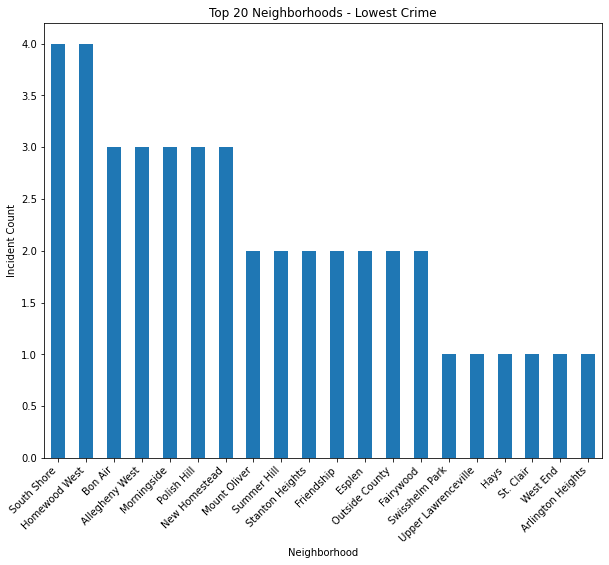

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

bot_20 = df['INCIDENTNEIGHBORHOOD'].value_counts().tail(20)

#make the graph pretty
graph = bot_20.plot(kind='bar', figsize=(10, 8))
graph.set_ylabel('Incident Count')
graph.set_xlabel('Neighborhood')
graph.set_title('Top 20 Neighborhoods - Lowest Crime')

plt.xticks(rotation=45, ha='right')

plt.show()

## Graph Analysis
As you can see in the above graph, there are 4 seperate neighborhoods which only had one incident reported, meaning they are all statistically great candidates for the best neighborhood.

In order to best assess which one is the safest I will look at each individual report and weigh the dangers of their crimes for Windgap, Swisshelm Park, Glen Hazel, and St. Cliar.

In [5]:
#make a query mask for all the lowest crime so I can qualitatively compare
bot5_query_mask = df['INCIDENTNEIGHBORHOOD'].str.contains("Swisshelm Park|West End|Hays|St. Clair|Arlington Heights",na=False)

bot5Data = df[bot5_query_mask]
bot5Data.head()

,INCIDENTTIME,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,OFFENSES
34,2023-11-03T04:53:00,"100 Block Wabash St Pittsburgh, PA 15220",West End,9999 9999 - (Misc. Incident):
401,2023-11-04T00:30:00,"1100 Block Uptegraf St Pittsburgh, PA 15218",Swisshelm Park,"2701(a)(1) Simple Assault - Intent., Know., Re..."
640,2023-11-13T10:17:00,"900 Block Agnew Rd Pittsburgh, PA 15017",Hays,9017 Found Drugs
646,2023-11-09T07:45:00,"500 Block Mountain Ave Pittsburgh, PA 15210",St. Clair,3745 Accidents Involving Damage to Unattended ...
1026,2023-11-14T07:30:00,"3000 Block Arlington Ave Pittsburgh, PA 15210",Arlington Heights,4106 Access Device Fraud


## Which Neighborhood is the Best?
Even though this section is subjective, I personally believe Arlington Heights has the least severe crime. I cannot see what West End's crime was, and the other 3 are more dangerous in their own ways. Assault is violent, access device fraud is personal and could be very harmful, and drugs are dangerous. 

This means that I believe that the best neighborhood is:
# ARLINGTON HEIGHTS!!
![all of the people of Arlington heights right now](https://media.giphy.com/media/1PMVNNKVIL8Ig/giphy.gif)